In [1]:
# import sys
# import os

# script_path = os.path.abspath(os.path.join(os.path.dirname("dataprep.py"), ".."))
# sys.path.append(script_path)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# from data_prep.dataprep import DataPrep
# data_ul= 'https://grouplens.org/datasets/movielens/'


# Set the default font size
plt.rcParams.update({'font.size': 6})


In [2]:
import pandas as pd
from typing import List
import re



class DataPrep:
    ratings_names: List[str] = ["userId", "movieId", "rating", "timestamp"]
    movies_names: List[str] = ["movieId", "title", "genres"]
    user_df_names: List[str] = ["userId", "gender", "age", "occupation", "zip-code"]

    def __init__(self, data_path: str):
        self.ratings: pd.DataFrame = pd.read_csv(data_path+ "/ratings.dat",sep="::", names=DataPrep.ratings_names, engine='python')
        self.movies: pd.DataFrame = pd.read_csv(data_path + "/movies.dat",sep="::", names=DataPrep.movies_names, engine='python', encoding='ISO-8859-1')
        self.users: pd.DataFrame = pd.read_csv(data_path + "/users.dat",sep="::", names=DataPrep.user_df_names, engine='python')
        self.merge_data()
        
    def merge_data(self):
        merged_data: pd.DataFrame = pd.merge(pd.merge(self.ratings, self.movies, on='movieId'), self.users, on='userId')
        splitted_genres: pd.DataFrame = merged_data.genres.str.get_dummies('|')
        cleaned_data: pd.DataFrame = pd.concat([merged_data, splitted_genres], axis=1)
        # cleaned_data['zip-code'] = cleaned_data['zip-code'].astype(str)
        cleaned_data[['title', 'year']] = cleaned_data['title'].str.extract(r'^(.*) \((\d{4})\)$')
        cleaned_data['year'] = pd.to_numeric(cleaned_data['year'])  
        cleaned_data.drop(columns=['genres','userId', 'movieId', 'title', 'timestamp','zip-code'], inplace=True)
        self.merged = pd.get_dummies(cleaned_data, columns=['gender', 'occupation'], drop_first=True)


### Import the movielens dataset

In [3]:
data = DataPrep(data_path="data")

In [4]:
data.merged

,rating,age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20
0,5,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,2,45,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000205,3,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,4,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,2,45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
data.ratings

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [7]:
data.users

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [8]:
print('Number of Unique Users    :', data.ratings.userId.nunique())
print('Number of Unique Movies :', data.ratings.movieId.nunique())
print('Number of Unique Ratings  :', data.ratings.rating.nunique())

Number of Unique Users    : 6040
Number of Unique Movies : 3706
Number of Unique Ratings  : 5


In [9]:
data.ratings.rating.unique()

array([5, 3, 4, 2, 1], dtype=int64)

 Inspected the MovieLens-1M dataset and got some pretty interesting insights from the graphs we saw, such as which movie genres tend to score higher than others in average. 

In [10]:
plt.rcParams.update({'font.size': 10})

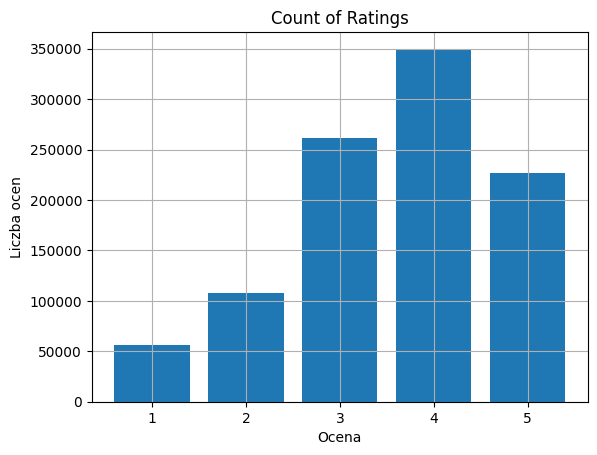

In [11]:
ratings_count = data.ratings.groupby(by=['rating']).agg({'userId': 'count'}).reset_index()
plt.bar(ratings_count.rating, ratings_count.userId)

plt.title('Count of Ratings')
plt.ylabel('Liczba ocen')
plt.xlabel('Ocena')
plt.grid()
plt.show()

From the given plot, we can infer that:

Majority of the ratings lie near 3-5, approximately.
Movies having scores near 1 are extremely rare

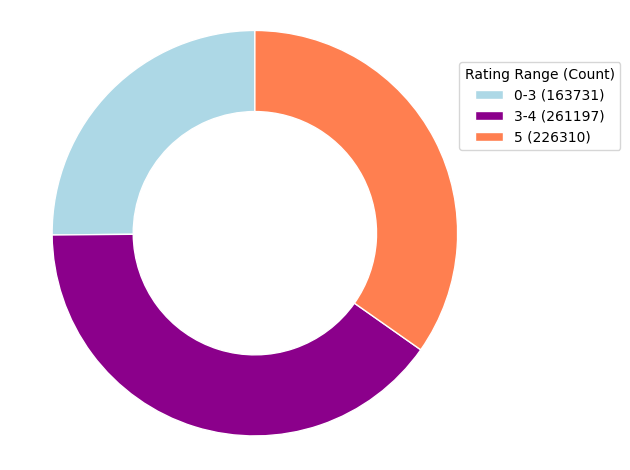

In [12]:
import matplotlib.pyplot as plt

# Calculate the count of ratings in different ranges
ratings_range_counts = [
    ((data.ratings['rating'] >= 0) & (data.ratings['rating'] < 3)).sum(),
    ((data.ratings['rating'] >= 3) & (data.ratings['rating'] < 4)).sum(),
    (data.ratings['rating'] == 5).sum()
]

# Define the rating ranges and corresponding colors
rating_ranges = ['0-3', '3-4', '5']
colors = ['lightblue', 'darkmagenta', 'coral']

# Create a pie chart
fig, ax1 = plt.subplots()
wedges, text = ax1.pie(ratings_range_counts, colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

# Equal aspect ratio ensures the pie chart is drawn as a circle
ax1.axis('equal')

# Add labels to the wedges
percentage_labels = ['{:.1f}%'.format((count / sum(ratings_range_counts)) * 100) for count in ratings_range_counts]

for i, wedge in enumerate(wedges):
    wedge.set_label(f'{rating_ranges[i]} ({ratings_range_counts[i]})')

plt.legend(title='Rating Range (Count)', loc='best', bbox_to_anchor=(0.9, 0.9))
plt.setp(wedges, width=0.4)

plt.tight_layout()
plt.show()


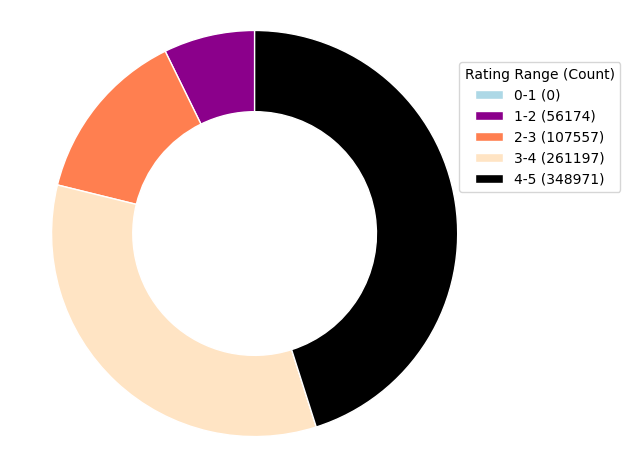

In [13]:
# Calculate the count of ratings in different ranges
ratings_range_counts = [((data.ratings['rating'] >= i) & (data.ratings['rating'] < i + 1)).sum() for i in range(5)]

# Define the rating ranges and corresponding colors
rating_ranges = ['0-1', '1-2', '2-3', '3-4', '4-5']
colors = ['lightblue', 'darkmagenta', 'coral', 'bisque', 'black']

# Create a pie chart
fig, ax1 = plt.subplots()
wedges, text = ax1.pie(ratings_range_counts, colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

# Equal aspect ratio ensures the pie chart is drawn as a circle
ax1.axis('equal')

# Add labels to the wedges
percentage_labels = ['{:.1f}%'.format((count / sum(ratings_range_counts)) * 100) for count in ratings_range_counts]

for i, wedge in enumerate(wedges):
    wedge.set_label(f'{rating_ranges[i]} ({ratings_range_counts[i]})')

plt.legend(title='Rating Range (Count)', loc='best', bbox_to_anchor=(0.9, 0.9))
plt.setp(wedges, width=0.4)

plt.tight_layout()
plt.show()

Let’s plot the distribution of movies per genre. For this, we will have to turn the genres column into a list and “explode” it. Note that each movie may be of several genres, and in this case, it will be counted multiple times. We will also plot the distribution of movies per movie release year.



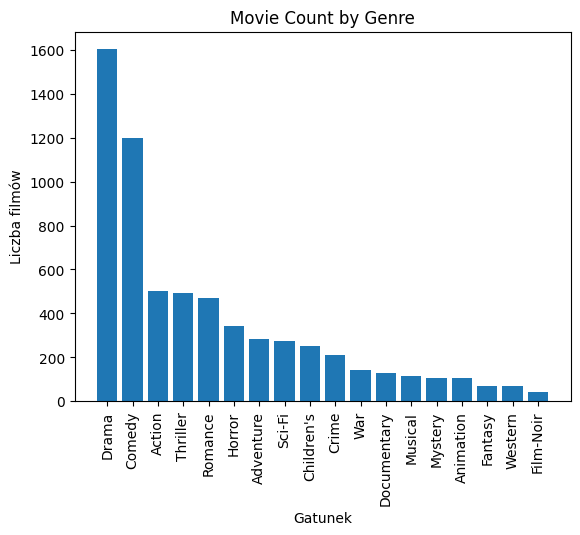

In [14]:
df_genres = data.movies['genres'].apply(lambda x: x.split('|'))
genre_counts = df_genres.explode().value_counts()
# plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Gatunek')
plt.ylabel('Liczba filmów')
plt.title('Movie Count by Genre')
plt.show()

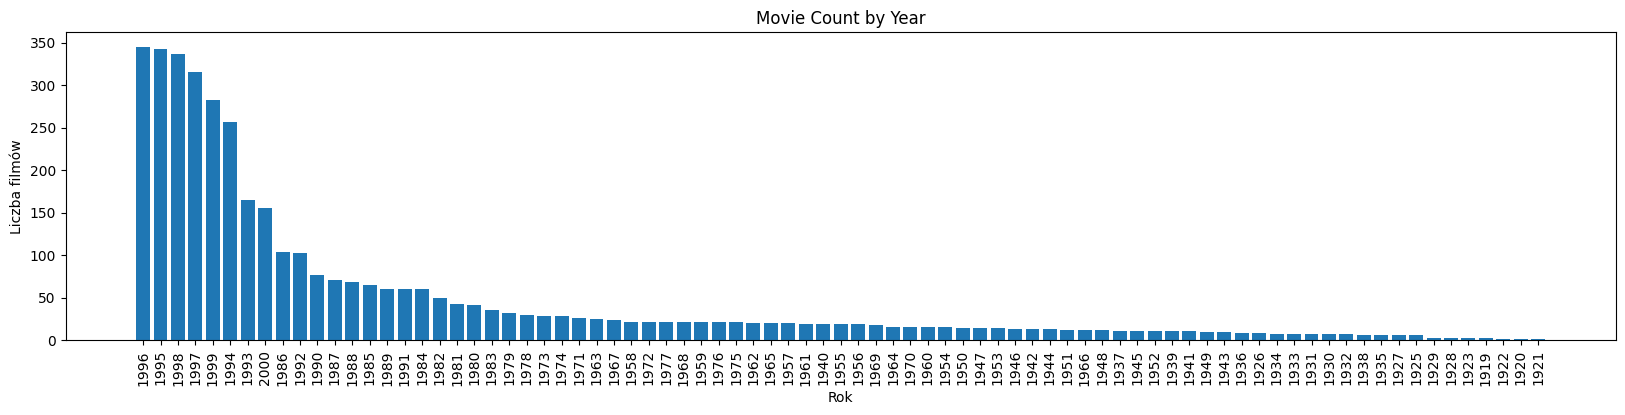

In [15]:
df = data.movies['title'].apply(lambda movie_name: re.search(r'\((\d{4})\)', movie_name).group(1) if re.search(r'\((\d{4})\)', movie_name) else None)
year_counts = df.value_counts()

plt.figure(figsize=(20 ,4))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Rok')
plt.ylabel('Liczba filmów')
plt.title('Movie Count by Year')
plt.xticks(rotation=90)
plt.show()

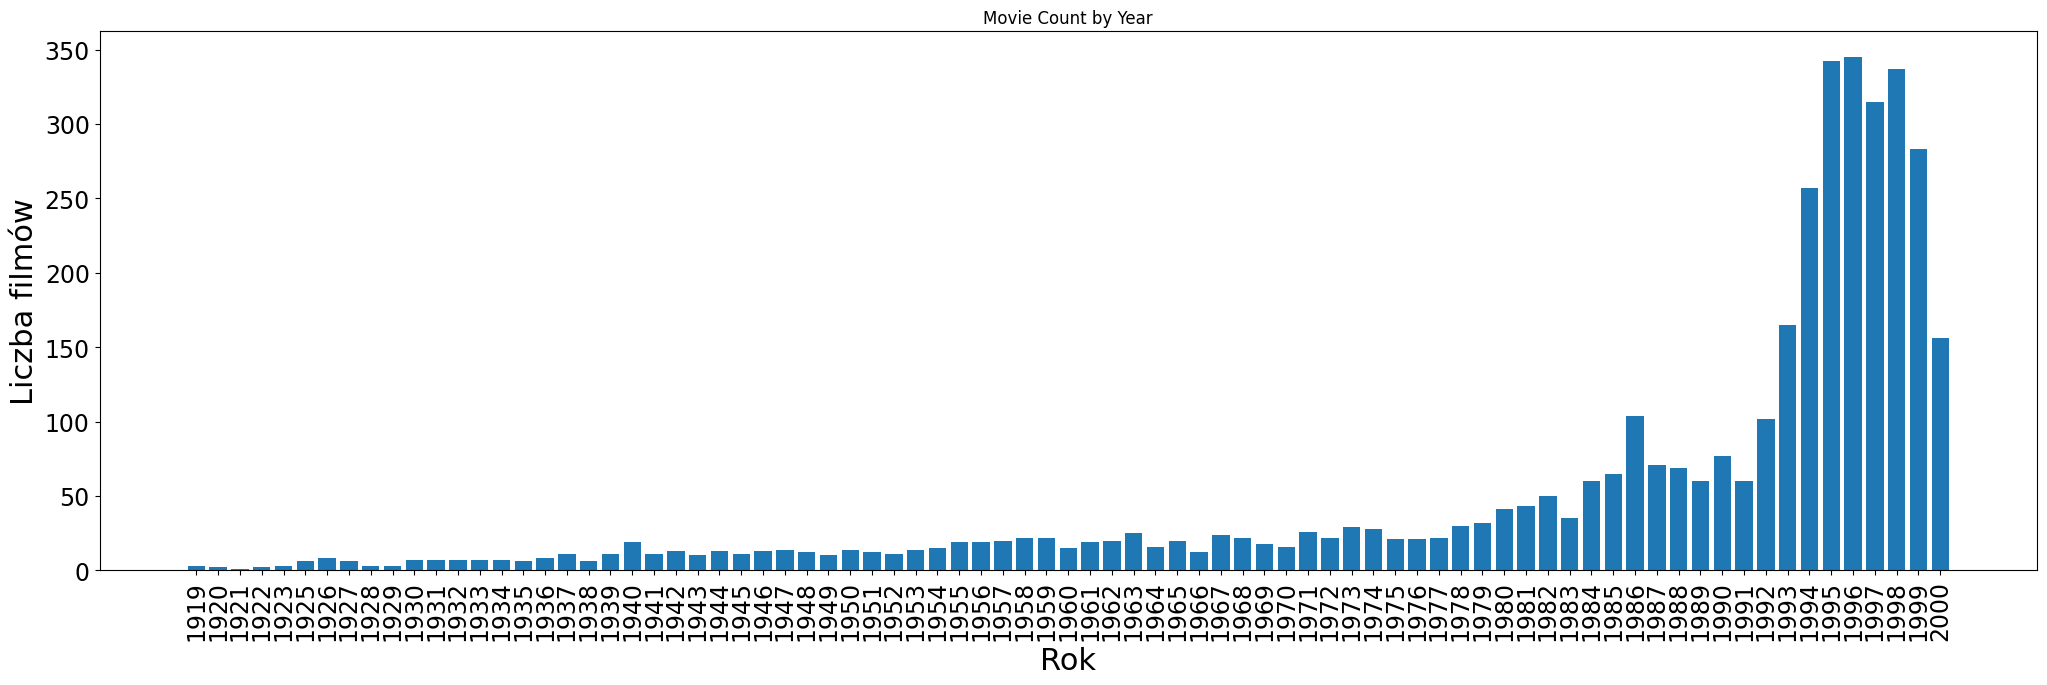

In [16]:
import matplotlib.pyplot as plt

df = data.movies['title'].apply(lambda movie_name: re.search(r'\((\d{4})\)', movie_name).group(1) if re.search(r'\((\d{4})\)', movie_name) else None)
year_counts = df.value_counts().sort_index()  # Sort the value counts by index (year)

plt.figure(figsize=(25, 7))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Rok', fontsize=22)
plt.ylabel('Liczba filmów', fontsize=22)
plt.title('Movie Count by Year')
plt.xticks(rotation=90, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

We can see an exponential growth of the movie business and a sudden drop in 2016. The latter is caused by the fact that the data is collected until October 2016 so we don’t have the full data on this year. As for the former, perhaps it was somewhat linked to the beginning of the information era. Growing popularity of the Internet must have had a positive impact on the demand for movies. That is certainly something worthy of further analysis.

Which are the movies with most occurances in the list?

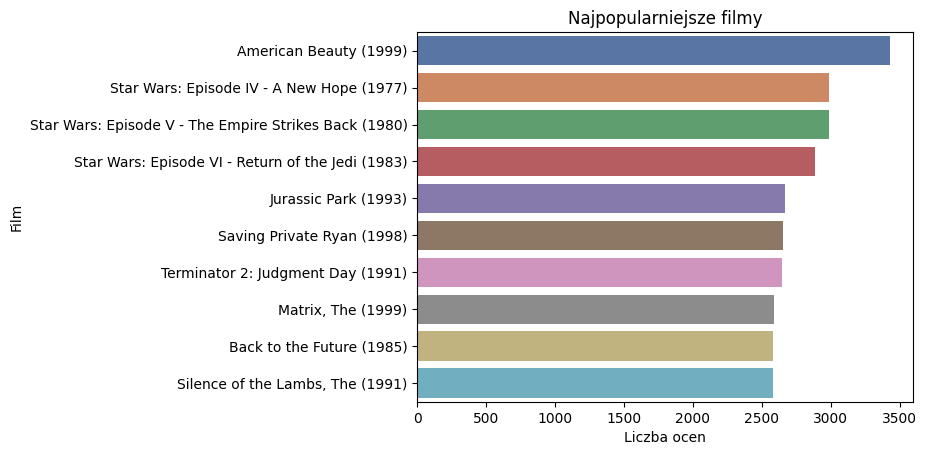

In [17]:
# sns.set_context('poster')
# plt.figure(figsize=(10,5))

popular_movies_count = data.ratings['movieId'].value_counts()[:10]
popular_movies = popular_movies_count.index.map(data.movies.set_index('movieId')['title'])
popular_movies_df = pd.DataFrame({'Movie': popular_movies, 'Count': popular_movies_count})

sns.barplot(x = popular_movies_df.Count, y = popular_movies_df.Movie, palette='deep', orient = 'h')
plt.title("Najpopularniejsze filmy")
plt.xlabel("Liczba ocen")
plt.ylabel("Film")
plt.show()

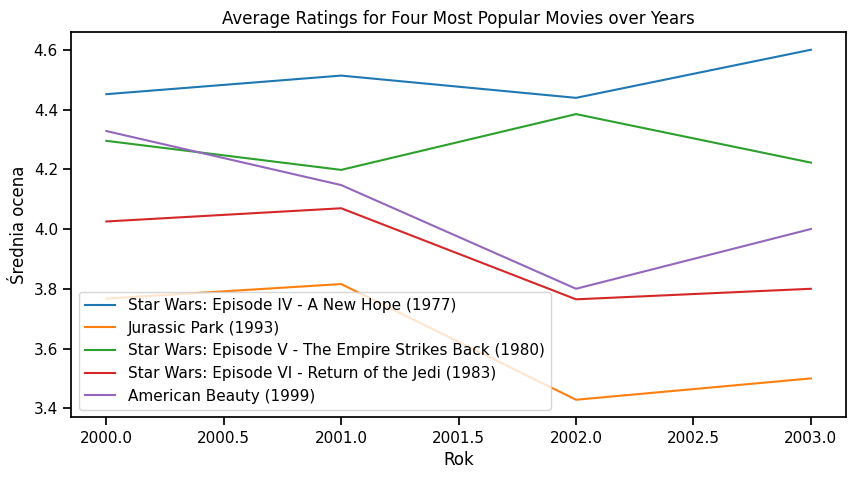

In [18]:
# Merge movies and ratings DataFrames
ratings, movies= data.ratings.copy(), data.movies.copy()

# Now, to revert to the default context
sns.set_context(context='notebook')

# Set the default font size
plt.rcParams.update({'font.size': 4})
merged_df = pd.merge(ratings, movies, on='movieId')

# Convert timestamp to year
merged_df['year'] = pd.to_datetime(merged_df['timestamp'], unit='s').dt.year

# Calculate average ratings for each movie and year combination
average_ratings = merged_df.groupby(['movieId', 'year'])['rating'].mean().reset_index()

# Find the three most popular movies based on the highest number of ratings
popular_movies = ratings['movieId'].value_counts().nlargest(5).index

# Filter the average ratings DataFrame for the three most popular movies
popular_movies_ratings = average_ratings[average_ratings['movieId'].isin(popular_movies)]

# Plot the average ratings for the three most popular movies across the years
plt.figure(figsize=(10, 5))
for movie_id, group in popular_movies_ratings.groupby('movieId'):
    movie_title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
    plt.plot(group['year'], group['rating'], label=movie_title)

plt.title('Average Ratings for Four Most Popular Movies over Years')
plt.xlabel('Rok')
plt.ylabel('Średnia ocena')
plt.legend()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True)
plt.show()

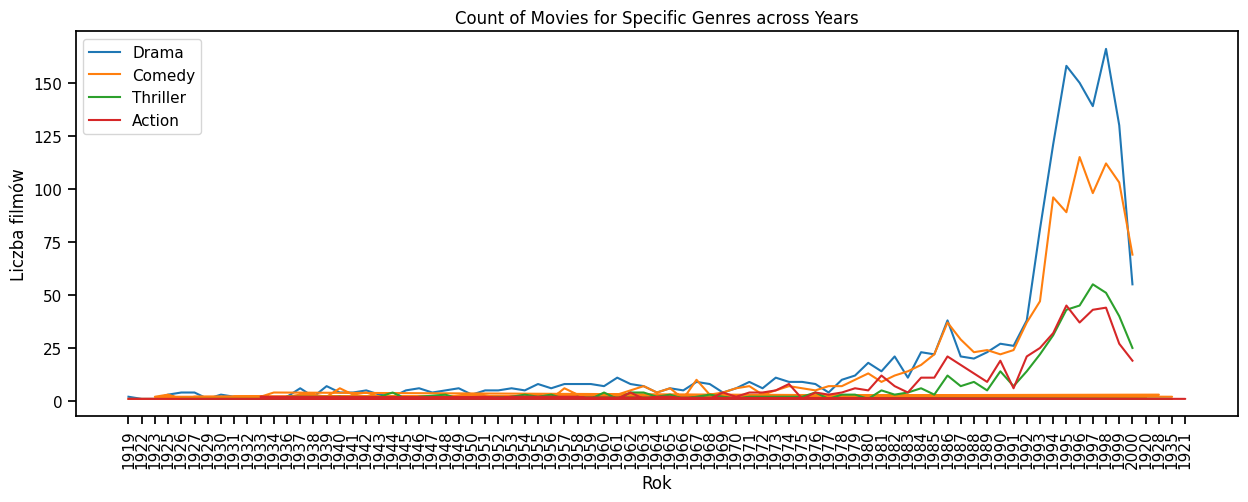

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrames 'movies' and 'ratings'
ratings, movies= data.ratings.copy(), data.movies.copy()
# Merge movies and ratings DataFrames
merged_df = pd.merge(ratings, movies, on='movieId')

# Extract the year from movie titles
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)

# Split the genres column into individual genres
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
# Define the desired genres
desired_genres = ['Drama', 'Comedy', 'Thriller', 'Action']

# Filter movies based on desired genres
filtered_movies = movies[movies['genres'].apply(lambda genres: any(genre in desired_genres for genre in genres))]

# Group movies by year and genre, and calculate the count of movies in each group
genre_counts = filtered_movies.explode('genres').groupby(['year', 'genres']).size().reset_index(name='count')

# Plot the count of movies for each genre across the years
plt.figure(figsize=(15, 5))
for genre in desired_genres:
    genre_data = genre_counts[genre_counts['genres'] == genre]
    plt.plot(genre_data['year'], genre_data['count'], label=genre)

plt.title('Count of Movies for Specific Genres across Years')
plt.xlabel('Rok')
plt.ylabel('Liczba filmów')

plt.xticks(rotation='vertical')
plt.legend()
plt.show()

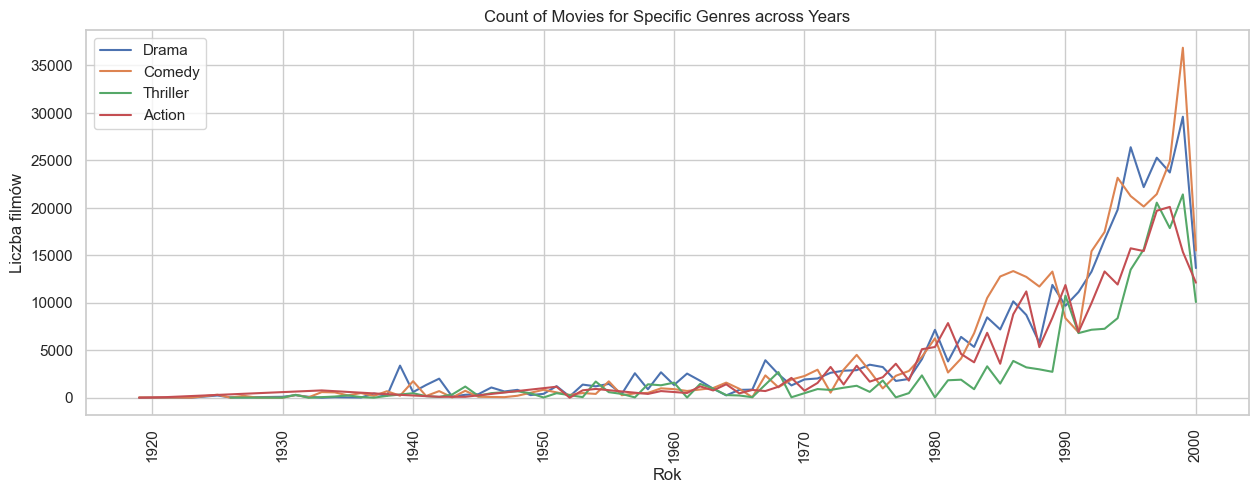

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrames 'movies' and 'ratings'
ratings, movies = data.ratings.copy(), data.movies.copy()

# Extract the year from movie titles
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)

# Split the genres column into individual genres
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Define the desired genres
desired_genres = ['Drama', 'Comedy', 'Thriller', 'Action']

# Filter movies based on desired genres
filtered_movies = movies[movies['genres'].apply(lambda genres: any(genre in desired_genres for genre in genres))]

# Merge filtered_movies and ratings DataFrames
merged_df = pd.merge(ratings, filtered_movies, on='movieId')

# Group movies by year and genre, and calculate the count of movies in each group
genre_counts = merged_df.explode('genres').groupby(['year', 'genres']).size().reset_index(name='count')

# Convert 'year' to integer type and sort it
genre_counts['year'] = genre_counts['year'].astype(int)
genre_counts = genre_counts.sort_values('year')

# Plot the count of movies for each genre across the years
plt.figure(figsize=(15, 5))
for genre in desired_genres:
    genre_data = genre_counts[genre_counts['genres'] == genre]
    plt.plot(genre_data['year'], genre_data['count'], label=genre)

plt.title('Count of Movies for Specific Genres across Years')
plt.xlabel('Rok')
plt.ylabel('Liczba filmów')

plt.xticks(rotation='vertical')
plt.legend()
plt.show()


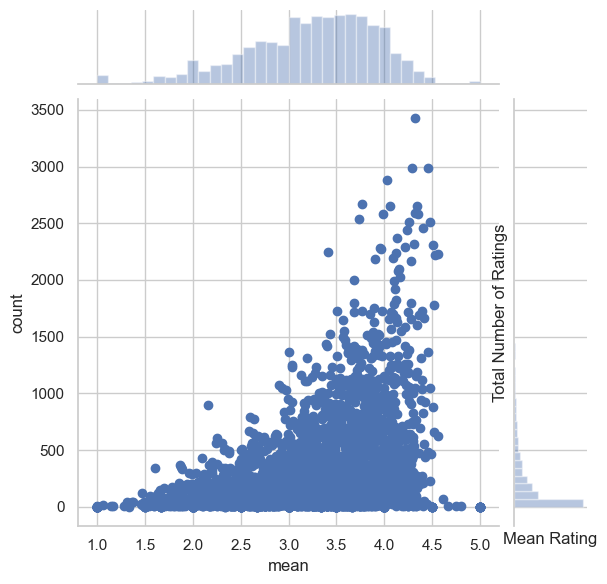

In [21]:

# Calculate the mean rating and total number of ratings for each movie
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean rating and total number of ratings for each movie
movie_ratings = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()

# Merge the movie information with the movie ratings
merged_data = movies.merge(movie_ratings, on='movieId')

# Create the joint plot with pivoted axes
sns.set(style='whitegrid')
sns.jointplot(data=merged_data, x='mean', y='count', kind='scatter')

# Set the labels and title
plt.xlabel('Mean Rating')
plt.ylabel('Total Number of Ratings')

plt.show()


Here, as you can see every Data Point represents a distinct Movie, with y-coordinate representing the total no of users which has rated that movie and x-coordinate representing the mean of all the ratings of the corresponding users.
Also you can see that there is a huge Density in the region corresponding to 0-500 no of users and between mean rating 3-4 .